### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [60]:
# Loads ggplot2 
library(ggplot2)

# Loads lubridate 
library(lubridate)

# Loads stringr 
library(stringr)

In [61]:
# Loads the bikeshare data from .csv files for three cities
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [62]:
# Shows the first row of New York city data
head(ny,1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998


In [63]:
# Shows the first row of Washington city data
head(wash,1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber


In [64]:
# Shows the first row of Chicago city data
head(chi,1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992


In [65]:
# Wants to merge the data of three data frames together and make one dataframe: 'all_data',
# and because of that we need to add a new column for 'city' to be able to separate the data of each city.
chi$city="Chicago"
ny$city="New York"
wash$city="Washington"

# Later, We wants to extract month, day of week, and hour form 'Start.Time' column, so we filter the invalid data.
ny=subset(ny, str_length(ny$Start.Time) == 19)
chi=subset(chi, str_length(chi$Start.Time) == 19)
wash=subset(wash, str_length(wash$Start.Time) == 19)

# Adds two columns 'Gender' and 'Birth.Year' to th 'wash' dataframe, to be ready for merge with other dataframes.
wash$Gender=NA
wash$Birth.Year=NA

# Merges the dataframes.
all_data = rbind(chi,ny,wash)

In [66]:
# Displays size of the all data.
sprintf("number of all rows: %d", nrow(all_data))

[1] "number of all rows: 152450"

## Question 1


**What are the most common month, day of week, and hour for traveling in each city?**


In [67]:
# Extracts month from 'Start.Time' column and adds it to the dataframe as a new column: Start.Month .
all_data$Start.Date <- as.POSIXct(all_data$Start.Time)

all_data$Start.Month <- format(all_data$Start.Date, format = "%m")

# Extracts day of week from 'Start.Time' column and adds it to the dataframe as a new column: Start.Day .
# It indexes Sunday as '1'.
all_data$Start.Day <- wday(all_data$Start.Date)

# Extracts hour from 'Start.Time' column and adds it to the dataframe as a new column: Start.Hour .
all_data$Start.Hour <- format(all_data$Start.Date, format = "%H")

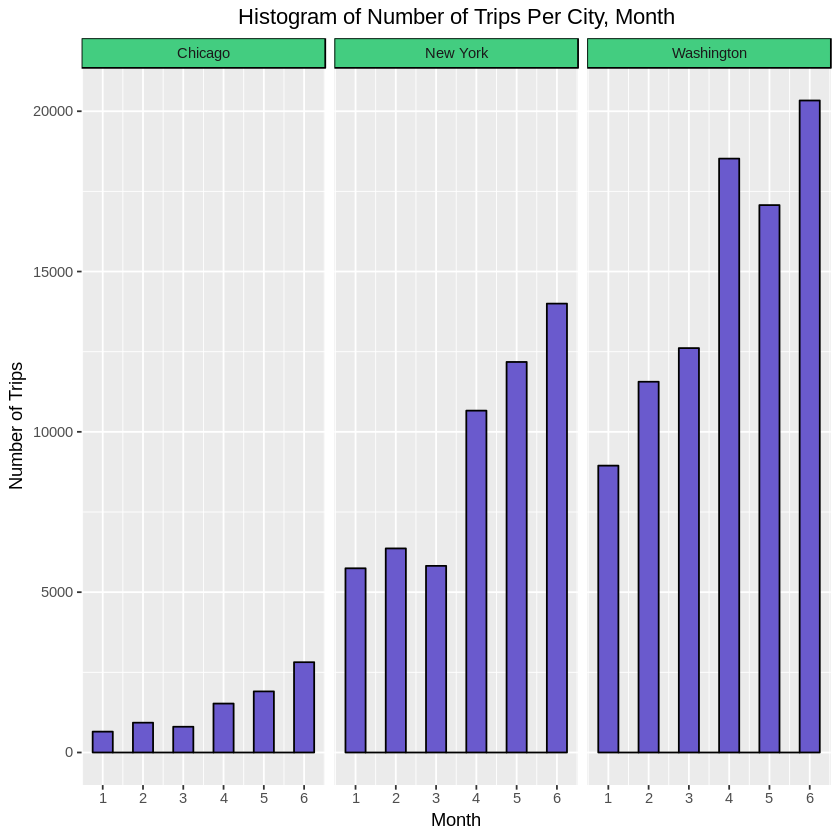

In [68]:
# Histogram of Number of Trips Per City, Month.
ggplot(aes(x=as.integer(Start.Month)), data=all_data) +
  geom_histogram(binwidth = 0.5, color = 'black', fill = 'slateblue') +
  ggtitle('Histogram of Number of Trips Per City, Month')  +
  labs(x = "Month", y = "Number of Trips") +
  scale_x_continuous(breaks = 1:6) +
  facet_wrap(~city) +
  theme(plot.title = element_text(hjust = 0.5), legend.position="none",
      strip.background=element_rect(colour="black", fill="seagreen3"))

**As seen in the diagram above, month 6 is the most common in all three cities.**

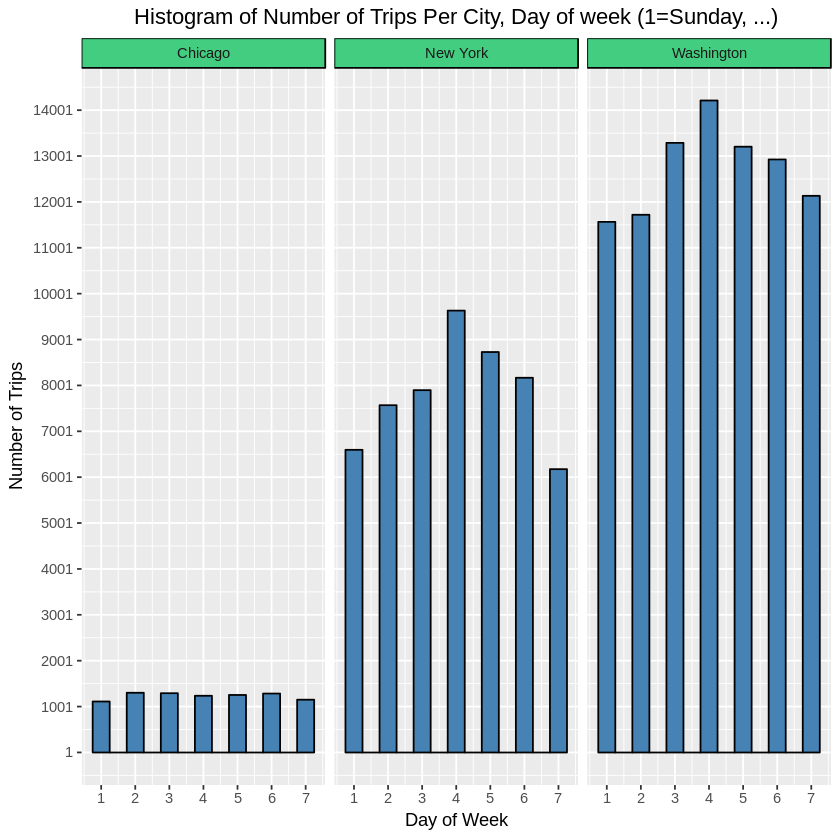

In [69]:
# Histogram of Number of Trips Per City, Day of Week.
ggplot(aes(x=Start.Day), data=all_data) + 
  geom_histogram(binwidth = 0.5, color = 'black', fill = 'steelblue') +
  ggtitle('Histogram of Number of Trips Per City, Day of week (1=Sunday, ...)')  +
  labs(x = "Day of Week", y = "Number of Trips") +
  scale_x_continuous(breaks = 1:7) +
  scale_y_continuous(breaks = seq(1,15000,1000)) +
  facet_wrap(~city) +
  theme(plot.title = element_text(hjust = 0.5), legend.position="none",
      strip.background=element_rect(colour="black", fill="seagreen3"))

**As seen in the diagram above, Wendsday is the most popular in New York and Washington cities, but for Chicago, it's not clear, so we run another command to clear that.**

In [70]:
# Separates the data of Chicago, and then gets count for each DOW with 'Start.Day' column
table(subset(all_data, all_data$city == 'Chicago')$Start.Day)


   1    2    3    4    5    6    7 
1111 1302 1292 1236 1254 1285 1150 

**As observed, Monday is the most popular day in Chicago, however Monday, Tuesday, and Friday are all quite close together.**

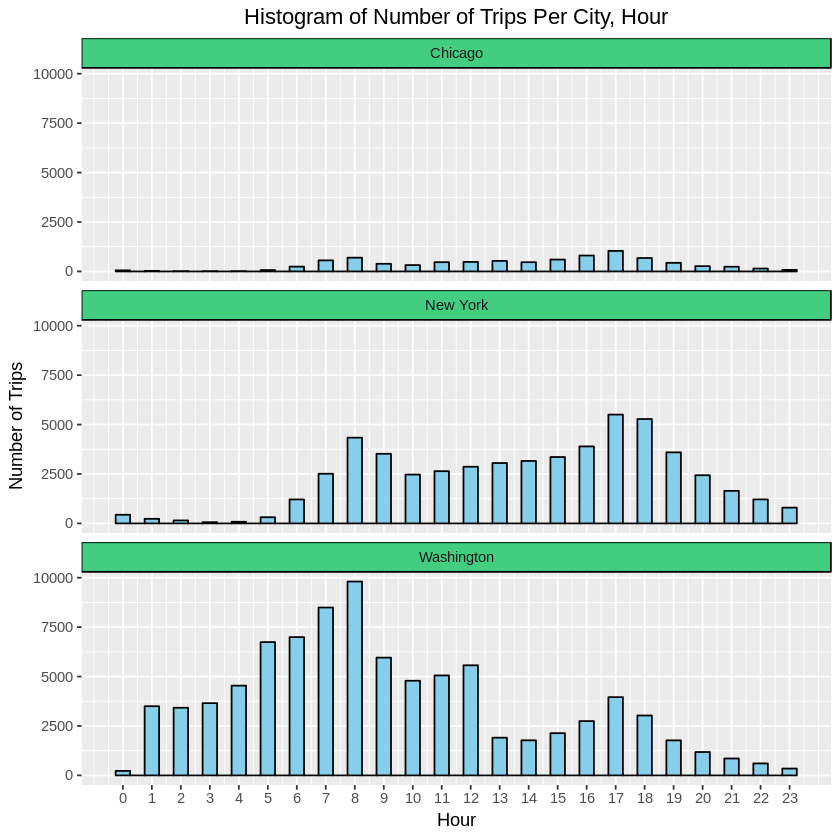

In [71]:
# Histogram of Number of Trips Per City, Hour.
ggplot(aes(as.integer(x=Start.Hour)), data=all_data) +
  geom_histogram(binwidth = 0.5, color = 'black', fill = 'skyblue') +
  ggtitle('Histogram of Number of Trips Per City, Hour')  +
  labs(x = "Hour", y = "Number of Trips") +
  scale_x_continuous(breaks = 0:23) +
  facet_wrap(~city, ncol=1) +
  theme(plot.title = element_text(hjust = 0.5), legend.position="none",
      strip.background=element_rect(colour="black", fill="seagreen3"))

**As seen in the diagram above, in Chicago and New York cities, 17:00 P.M. is the most popular, but in Washington, 8:00 A.M. is the most common.**

## Question 2

**What are the most frequently used start and end stations in each city?**


In [72]:
# Creates a new function to calculate Mode for input array.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [73]:
# Iterates three cities, and finds the most popular start and end stations for each of them.
for (curr_city in unique(all_data$city)) {    
  curr_city_data = subset(all_data, all_data$city == curr_city)
  
  cat(paste("\n\nThe most frequently used stations in ", curr_city, "--> "))  
    
  popular_start_station = getmode(curr_city_data$Start.Station)
  cat(paste("\nThe most popular start station: ", popular_start_station))

  popular_end_station = getmode(curr_city_data$End.Station)
  cat(paste("\nThe most popular end station: ", popular_end_station))
}



The most frequently used stations in  Chicago --> 
The most popular start station:  Streeter Dr & Grand Ave
The most popular end station:  Streeter Dr & Grand Ave

The most frequently used stations in  New York --> 
The most popular start station:  Pershing Square North
The most popular end station:  Pershing Square North

The most frequently used stations in  Washington --> 
The most popular start station:  Columbus Circle / Union Station
The most popular end station:  Columbus Circle / Union Station


**What are the usual ranges of trips in each city?**

In [74]:
# Gets stats for Trip.Duration to config better Box Plot diagram.
summary(all_data$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60     392     667    1098    1159 1088634       1 

In [75]:
# Gets stats for Trip.Duration to config better Box Plot diagram.
by(subset(all_data, !is.na(Trip.Duration))$Trip.Duration, subset(all_data, !is.na(Trip.Duration))$city, median)

subset(all_data, !is.na(Trip.Duration))$city: Chicago
[1] 670
------------------------------------------------------------ 
subset(all_data, !is.na(Trip.Duration))$city: New York
[1] 610
------------------------------------------------------------ 
subset(all_data, !is.na(Trip.Duration))$city: Washington
[1] 706.991

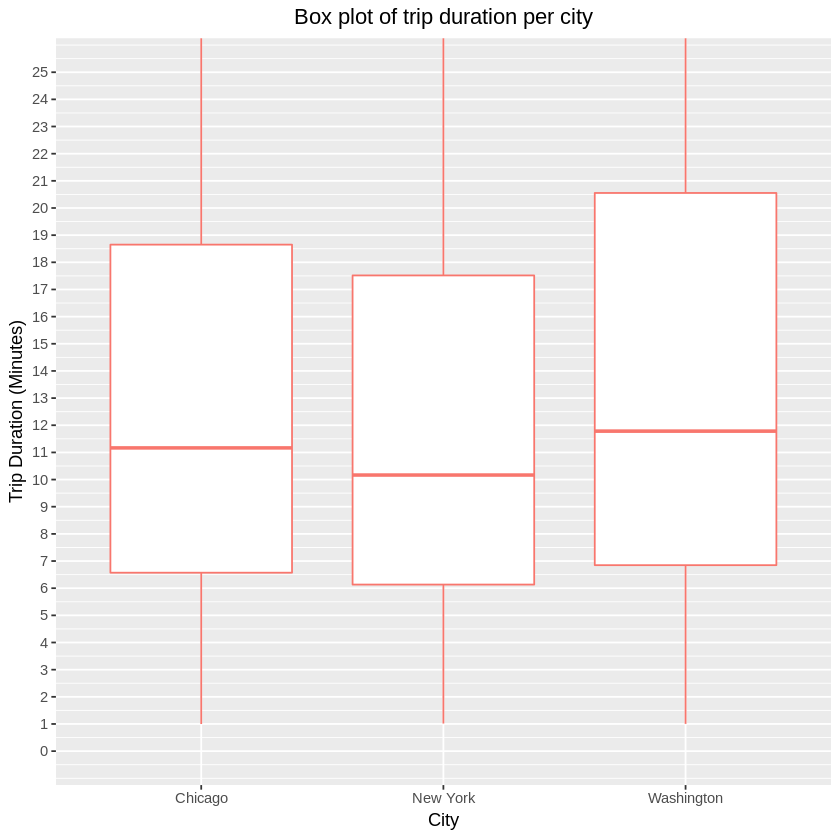

In [76]:
# Draws a Box Plot diagram for display the range of data.
qplot(x = city, y = Trip.Duration/60,
      data =subset(all_data, !is.na(Trip.Duration)), 
      geom = 'boxplot', color='seagreen') +

  ggtitle('Box plot of trip duration per city') +

  labs(x = "City", y="Trip Duration (Minutes)") +

  theme(plot.title = element_text(hjust = 0.5), legend.position='none') +
  coord_cartesian(ylim = c(0,25)) +
  scale_y_continuous(breaks = seq(0,25, 1)) 


**As seen in the diagram above, 50% of trips in Chicago last 6.5 to 18.5 minutes, 50% in New York last 6 to 18 minutes, and 50% in Washington last 7 to 21 minutes.**
<br><br>
**Also, median of trip durations in Chicago is 11 minutes, in New York is 10 minutes, and in Washington is around 12 minuts.**

## Question 3

**How is the relation between user's age and their trip duration?**

In [77]:
# Gets stats for 'Birth.Year' column.
summary(all_data$Birth.Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1970    1981    1979    1988    2002   96015 

In [78]:
# Gets stats for 'Trip.Duration' column.
summary(all_data$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60     392     667    1098    1159 1088634       1 

Warning message:
“Ignoring unknown parameters: fun”No summary function supplied, defaulting to `mean_se()


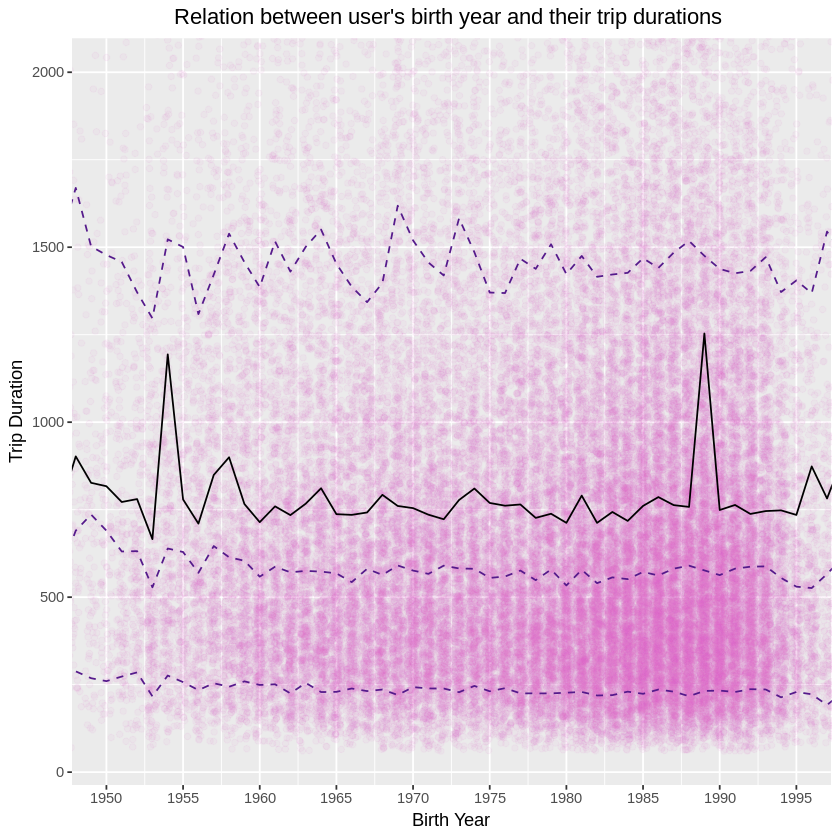

In [79]:
# Draws a Scatter Plot for show the relation between the user's birth year and their trip duration.
ggplot(aes(x = as.integer(Birth.Year), y = Trip.Duration), data = subset(all_data, !is.na(Birth.Year))) +
  
  ggtitle('Relation between user\'s birth year and their trip durations ') +

  labs(x = "Birth Year", y="Trip Duration") +

  theme(plot.title = element_text(hjust = 0.5)) +

  coord_cartesian(xlim = c(1950,1995), ylim = c(60,2000)) +

  geom_point(alpha=0.05, position = position_jitter(h=0), color = 'orchid') +

  scale_x_continuous(breaks = seq(1950,1995, 5)) +

  stat_summary (geom = "line", fun = 'mean') +
 
  stat_summary (geom = "line", fun.y = quantile, fun.args = list(probs = .1),
                linetype=2, color='purple4') +
  stat_summary (geom = "line", fun.y = quantile, fun.args = list(probs = .5),
                linetype=2, color='purple4') +   
  stat_summary (geom = "line", fun.y = quantile, fun.args = list(probs = .9),
               linetype=2, color='purple4')  

**As seen in the diagram above, the users's birth year, between 1980 to 1995, makes most of the data and we have a steady range for different quantiles, and there isn't meaningful relation between age and trip duration.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [80]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')